# <center>Data Mining Group Project


***Poject Plan***

The project plan will proceed as follows, in three relatively ambiguous “steps”. First, we will preprocess the dataset. We will visualize both the dataset before preprocessing as well as after preprocessing, so as to see the effect of said preprocessing. Second, we will train the dataset using classification models such as logistic regression, random forest classifier, etc. Finally , upon evaluation we will make a complete platform that users can type in brief texts of which will be processed by one of our models, and then display the resulting classification of emotions.

***Content***
 - Data Preprocessing
 - Data Visualization
 - Model training
 - Evaluation
 - User Application (TBD)


#### All needed libraries are imported here.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

import json

import nltk
nltk.download('stopwords')

import re
import string
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raven\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## EDA (Explatory Data Analysis)

In the database, there were thre raw csv files:  
goemotions_1.csv, goemotions_2.csv, goemotions_3.csv    

All the files include texts and their emotions. The emotions are classified into 28 kinds (admiration, amusement ... , neutral). Also, there are other columns such as id, author, subreddit, etc.

In [4]:
goemo1 = pd.read_csv('goemotions_1.csv',encoding='latin-1')
goemo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  70000 non-null  object 
 1   id                    70000 non-null  object 
 2   author                70000 non-null  object 
 3   subreddit             70000 non-null  object 
 4   link_id               70000 non-null  object 
 5   parent_id             70000 non-null  object 
 6   created_utc           70000 non-null  float64
 7   rater_id              70000 non-null  int64  
 8   example_very_unclear  70000 non-null  bool   
 9   admiration            70000 non-null  int64  
 10  amusement             70000 non-null  int64  
 11  anger                 70000 non-null  int64  
 12  annoyance             70000 non-null  int64  
 13  approval              70000 non-null  int64  
 14  caring                70000 non-null  int64  
 15  confusion          

In [5]:
goemo2 = pd.read_csv('goemotions_2.csv',encoding='latin-1')
goemo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  70000 non-null  object 
 1   id                    70000 non-null  object 
 2   author                70000 non-null  object 
 3   subreddit             70000 non-null  object 
 4   link_id               70000 non-null  object 
 5   parent_id             70000 non-null  object 
 6   created_utc           70000 non-null  float64
 7   rater_id              70000 non-null  int64  
 8   example_very_unclear  70000 non-null  bool   
 9   admiration            70000 non-null  int64  
 10  amusement             70000 non-null  int64  
 11  anger                 70000 non-null  int64  
 12  annoyance             70000 non-null  int64  
 13  approval              70000 non-null  int64  
 14  caring                70000 non-null  int64  
 15  confusion          

In [6]:
goemo3 = pd.read_csv('goemotions_3.csv',encoding='latin-1')
goemo3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71225 entries, 0 to 71224
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  71225 non-null  object 
 1   id                    71225 non-null  object 
 2   author                71225 non-null  object 
 3   subreddit             71225 non-null  object 
 4   link_id               71225 non-null  object 
 5   parent_id             71225 non-null  object 
 6   created_utc           71225 non-null  float64
 7   rater_id              71225 non-null  int64  
 8   example_very_unclear  71225 non-null  bool   
 9   admiration            71225 non-null  int64  
 10  amusement             71225 non-null  int64  
 11  anger                 71225 non-null  int64  
 12  annoyance             71225 non-null  int64  
 13  approval              71225 non-null  int64  
 14  caring                71225 non-null  int64  
 15  confusion          

We integrate 3 files into one. Now there are 211,225 rows in total.

In [7]:
# List files
files = ['goemotions_1.csv', 'goemotions_2.csv', 'goemotions_3.csv']

# Read & combine
df_combined = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

# Save
combined_file = "goemo_combined.csv"
df_combined.to_csv(combined_file, index=False)
print("CSV files merged into ", combined_file)

df_combined.info()

CSV files merged into  goemo_combined.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211225 entries, 0 to 211224
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   text                  211225 non-null  object 
 1   id                    211225 non-null  object 
 2   author                211225 non-null  object 
 3   subreddit             211225 non-null  object 
 4   link_id               211225 non-null  object 
 5   parent_id             211225 non-null  object 
 6   created_utc           211225 non-null  float64
 7   rater_id              211225 non-null  int64  
 8   example_very_unclear  211225 non-null  bool   
 9   admiration            211225 non-null  int64  
 10  amusement             211225 non-null  int64  
 11  anger                 211225 non-null  int64  
 12  annoyance             211225 non-null  int64  
 13  approval              211225 non-null  int64  
 14  caring    

Let's see the frequency of each emotions. We can see most of the dataset is classified as 'neutral.'

neutral           55298
approval          17620
admiration        17131
annoyance         13618
gratitude         11625
disapproval       11424
curiosity          9692
amusement          9245
realization        8785
optimism           8715
disappointment     8469
love               8191
anger              8084
joy                7983
confusion          7359
sadness            6758
caring             5999
excitement         5629
surprise           5514
disgust            5301
desire             3817
fear               3197
remorse            2525
embarrassment      2476
nervousness        1810
pride              1302
relief             1289
grief               673
dtype: int64


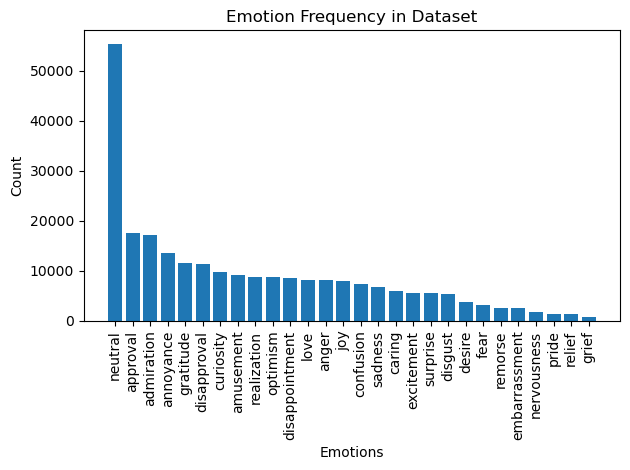

In [8]:
emotion_cols = [c for c in df_combined.columns if pd.api.types.is_integer_dtype(df_combined[c]) and c != 'rater_id' and c != 'length']
counts = df_combined[emotion_cols].sum().sort_values(ascending=False)

print(counts)

plt.figure()
plt.bar(counts.index, counts.values)
plt.title("Emotion Frequency in Dataset")
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Let's group the emotions into 3 groups - positive, negative, and ambiguous.  
We will use sentiment_mapping.json file.

In [9]:
with open('sentiment_mapping.json', 'r') as senti_map_file:
    senti_mapping = json.load(senti_map_file)

print(json.dumps(senti_mapping, indent=4))

{
    "positive": [
        "amusement",
        "excitement",
        "joy",
        "love",
        "desire",
        "optimism",
        "caring",
        "pride",
        "admiration",
        "gratitude",
        "relief",
        "approval"
    ],
    "negative": [
        "fear",
        "nervousness",
        "remorse",
        "embarrassment",
        "disappointment",
        "sadness",
        "grief",
        "disgust",
        "anger",
        "annoyance",
        "disapproval"
    ],
    "ambiguous": [
        "realization",
        "surprise",
        "curiosity",
        "confusion",
        "neutral"
    ]
}


Emotion         Count    Sentiment
----------------------------------------
neutral         55298    ambiguous
approval        17620    positive
admiration      17131    positive
annoyance       13618    negative
gratitude       11625    positive
disapproval     11424    negative
curiosity       9692     ambiguous
amusement       9245     positive
realization     8785     ambiguous
optimism        8715     positive
disappointment  8469     negative
love            8191     positive
anger           8084     negative
joy             7983     positive
confusion       7359     ambiguous
sadness         6758     negative
caring          5999     positive
excitement      5629     positive
surprise        5514     ambiguous
disgust         5301     negative
desire          3817     positive
fear            3197     negative
remorse         2525     negative
embarrassment   2476     negative
nervousness     1810     negative
pride           1302     positive
relief          1289     positive
g

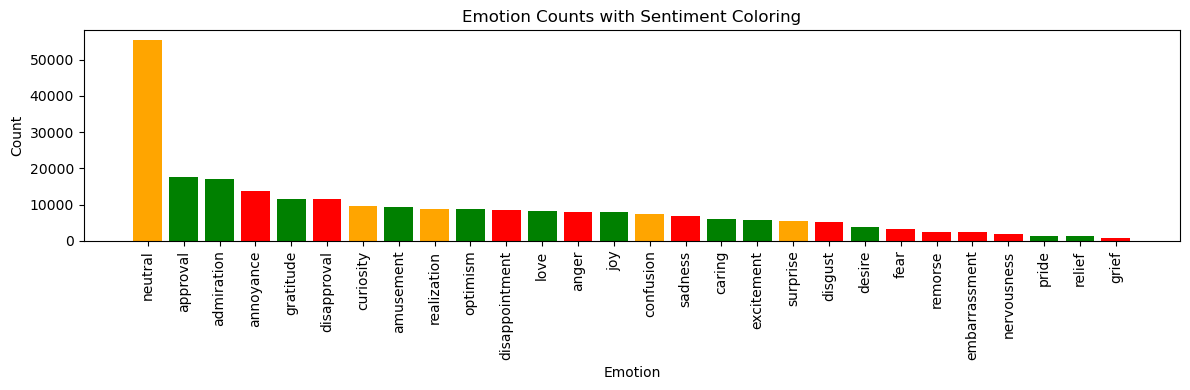

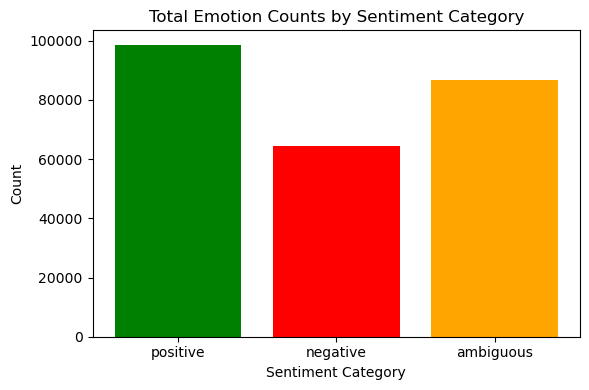

In [10]:
GREEN = "\033[92m"
RED = "\033[91m"
ORANGE = "\033[93m"
GRAY = "\033[90m"
RESET = "\033[0m"

positive = set(senti_mapping["positive"])
negative = set(senti_mapping["negative"])
ambiguous = set(senti_mapping["ambiguous"])

plot_colors = []

print(f"{'Emotion':<15} {'Count':<8} Sentiment")
print("-" * 40)

for emo, count in counts.items():
    if emo in positive:
        color, label = GREEN, "positive"
        plot_colors.append("green")
    elif emo in negative:
        color, label = RED, "negative"
        plot_colors.append("red")
    elif emo in ambiguous:
        color, label = ORANGE, "ambiguous"
        plot_colors.append("orange")
    else:
        color, label = GRAY, "neutral"
        plot_colors.append("gray")

    print(f"{color}{emo:<15} {count:<8} {label}{RESET}")

# colored plot for each emotions
plt.figure(figsize=(12,4))
plt.bar(counts.index, counts.values, color=plot_colors)
plt.title("Emotion Counts with Sentiment Coloring")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

total_positive = sum(counts[emo] for emo in positive if emo in counts.index)
total_negative = sum(counts[emo] for emo in negative if emo in counts.index)
total_ambiguous = sum(counts[emo] for emo in ambiguous if emo in counts.index)

sentiment_totals = {
    "positive": total_positive,
    "negative": total_negative,
    "ambiguous": total_ambiguous
}

# plot for the three categories
plt.figure(figsize=(6,4))
plt.bar(sentiment_totals.keys(),
        sentiment_totals.values(),
        color=["green","red","orange"])

plt.title("Total Emotion Counts by Sentiment Category")
plt.ylabel("Count")
plt.xlabel("Sentiment Category")
plt.tight_layout()
plt.show()

Let's see the length of texts too. The text length is generally about 70.

In [11]:
df_combined['length'] = df_combined['text'].apply(len)

max_len = df_combined["length"].max()
min_len = df_combined["length"].min()
avg_len = df_combined["length"].mean()
median_len = df_combined["length"].median()

print(f"Maximum text length: {max_len}")
print(f"Minimum text length: {min_len}")
print(f"Average text length: {avg_len:.2f}")
print(f"Median text length: {median_len}")


Maximum text length: 703
Minimum text length: 2
Average text length: 69.30
Median text length: 67.0


Is there any relationship between emotion and text lenght? Let's plot the average text length of each emotions.  
It seems there is not huge gap between each emotions but positive texts are generally shorter than negative ones.

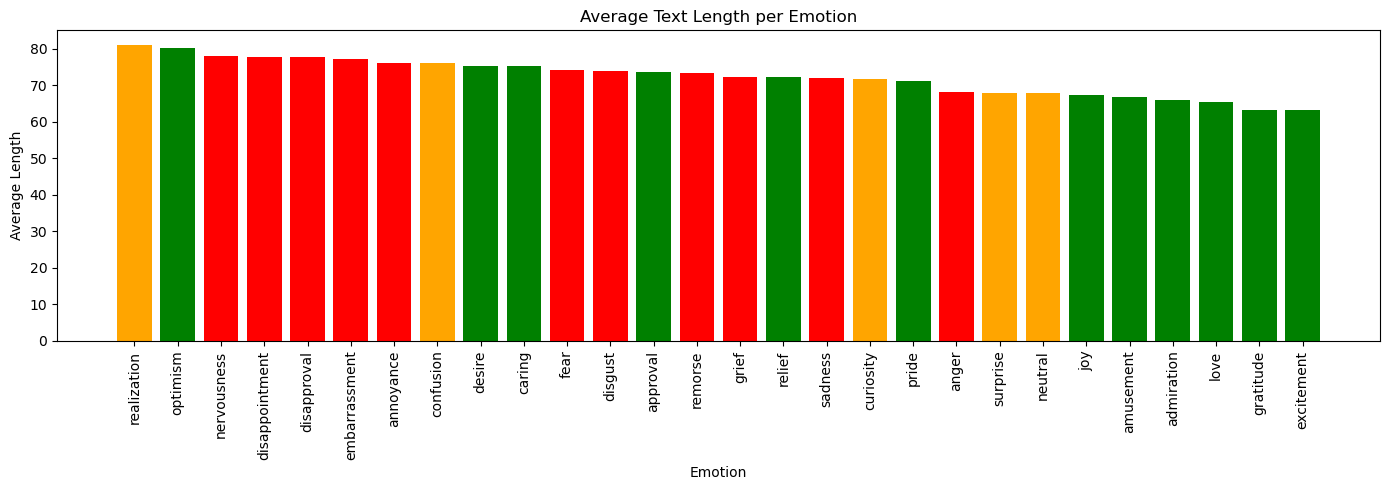

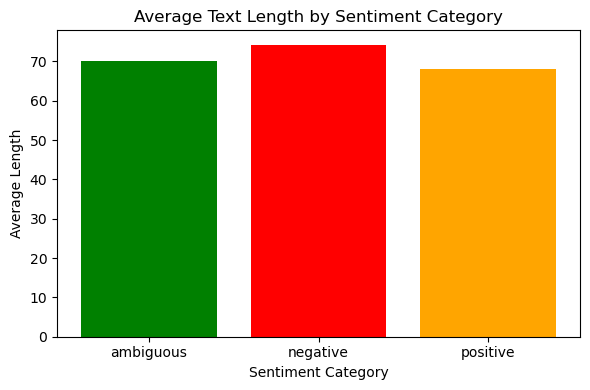

In [12]:


# Average text length per emotion (only where emotion==1)
avg_len_per_emotion = {
    emo: df_combined.loc[df_combined[emo]==1, "length"].mean()
    for emo in emotion_cols
}

avg_len_per_emotion = pd.Series(avg_len_per_emotion).sort_values(ascending=False)

# Sentiment color mapping
def get_color(emo):
    if emo in senti_mapping["positive"]:
        return "green"
    elif emo in senti_mapping["negative"]:
        return "red"
    elif emo in senti_mapping["ambiguous"]:
        return "orange"
    else:
        return "gray"

colors = [get_color(e) for e in avg_len_per_emotion.index]

# Plot per emotion with colors
plt.figure(figsize=(14,5))
plt.bar(avg_len_per_emotion.index, avg_len_per_emotion.values, color=colors)
plt.title("Average Text Length per Emotion")
plt.xlabel("Emotion")
plt.ylabel("Average Length")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Average text length per sentiment category (positive / negative / ambiguous)
positive = sorted(set(senti_mapping.get("positive", [])) & set(emotion_cols))
negative = sorted(set(senti_mapping.get("negative", [])) & set(emotion_cols))
ambiguous = sorted(set(senti_mapping.get("ambiguous", [])) & set(emotion_cols))

pos_mask = df_combined[positive].any(axis=1) if positive else pd.Series(False, index=df_combined.index)
neg_mask = df_combined[negative].any(axis=1) if negative else pd.Series(False, index=df_combined.index)
amb_mask = df_combined[ambiguous].any(axis=1) if ambiguous else pd.Series(False, index=df_combined.index)

avg_len_pos = df_combined.loc[pos_mask, "length"].mean()
avg_len_neg = df_combined.loc[neg_mask, "length"].mean()
avg_len_amb = df_combined.loc[amb_mask, "length"].mean()

category_avgs = pd.Series({
    "positive": avg_len_pos,
    "negative": avg_len_neg,
    "ambiguous": avg_len_amb
}).sort_index()

plt.figure(figsize=(6, 4))
plt.bar(category_avgs.index, category_avgs.values, color=["green","red","orange"])
plt.title("Average Text Length by Sentiment Category")
plt.xlabel("Sentiment Category")
plt.ylabel("Average Length")
plt.tight_layout()
plt.show()

## Data Preprocessing

The raw data is not labeled appropriately since the format is transaction table.
So we need to convert it to have only to columns; 'text' and 'class.'

In [13]:
# Identify emotion columns (all int emotion labels)
emotion_cols = [c for c in df_combined.columns
                if pd.api.types.is_integer_dtype(df_combined[c]) and c != "rater_id" and c != "length"]

# Convert rows to list of active emotions
def get_emotions(row):
    labels = [emo for emo in emotion_cols if row[emo] == 1]
    return ", ".join(labels) if labels else "neutral"

df_2col = pd.DataFrame({
    "text": df_combined["text"],
    "class": df_combined.apply(get_emotions, axis=1)
})

# Save to file
df_2col.to_csv("goemotions_2col_28emotions.csv", index=False)

df_2col.head()

,text,class
0,That game hurt.,sadness
1,>sexuality shouldn’t be a grouping category I...,neutral
2,"You do right, if you don't care then fuck 'em!",neutral
3,Man I love reddit.,love
4,"[NAME] was nowhere near them, he was by the Fa...",neutral


Now, let's do the basic cleansing.  
  
- remove non-English chars

- fix encoding

- Lowercase
    
- Remove URLs
    
- Remove @mentions
    
- Remove emojis
    
- Remove punctuation
    
- Remove stopwords
    
- Strip whitespace

In [14]:
# English stopwords list
stop_words = set(stopwords.words('english'))

# Regex patterns
URL_RE = re.compile(r'https?://\S+|www\.\S+')
MENTION_RE = re.compile(r'@\w+')
EMOJI_RE = re.compile(r"[\U00010000-\U0010ffff]", flags=re.UNICODE)  # emoji range

def clean_text_basic(text):
    if not isinstance(text, str):
        return ""
    # remove non-English chars
    text = re.sub(r"[^A-Za-z0-9 .,!?\'\"-]", "", text)

    # fix encoding
    text = text.encode("latin1", errors="ignore").decode("utf8", errors="ignore")

    # Lowercase
    text = text.lower()
    
    # Remove URLs
    text = URL_RE.sub("", text)
    
    # Remove @mentions
    text = MENTION_RE.sub("", text)
    
    # Remove emojis
    text = EMOJI_RE.sub("", text)
    
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Remove stopwords
    words = [w for w in text.split() if w not in stop_words]
    text = " ".join(words)
    
    # Strip whitespace
    text = text.strip()
    
    return text

# Apply cleaning
df_2col["text"] = df_2col["text"].astype(str).apply(clean_text_basic)

# Remove empty rows
df_2col = df_2col[df_2col["text"].str.strip().str.len() > 0].copy()

df_2col.to_csv("goemotions_2col_28emotions_cleansed.csv", index=False)
print("Rows after cleaning:", len(df_2col))
df_2col.head()

Rows after cleaning: 210833


,text,class
0,game hurt,sadness
1,sexuality shouldnt grouping category makes dif...,neutral
2,right dont care fuck em,neutral
3,man love reddit,love
4,name nowhere near falcon,neutral


Binarizer and Encoder

In [15]:
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
import pandas as pd

# Assume df_2col has 'text' and 'class' (comma-separated for multi-label)
df_2col['labels'] = df_2col['class'].str.split(', ')
mlb = MultiLabelBinarizer()  # For multi-label
y = mlb.fit_transform(df_2col['labels'])
print("Classes:", mlb.classes_)  # e.g., ['admiration', ..., 'neutral']

# For single-class: df_2col['class'] = df_2col['class'].str.split(', ').str[0]  # Take first label
# le = LabelEncoder(); y = le.fit_transform(df_2col['class'])

Classes: ['admiration' 'amusement' 'anger' 'annoyance' 'approval' 'caring'
 'confusion' 'curiosity' 'desire' 'disappointment' 'disapproval' 'disgust'
 'embarrassment' 'excitement' 'fear' 'gratitude' 'grief' 'joy' 'love'
 'nervousness' 'neutral' 'optimism' 'pride' 'realization' 'relief'
 'remorse' 'sadness' 'surprise']


## Separating dataset

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Robust split
unique_rows, counts = np.unique(y, axis=0, return_counts=True)
stratify_param = y if np.all(counts >= 2) else None
X_train, X_test, y_train, y_test = train_test_split(
    df_2col['text'], y, test_size=0.2, random_state=42, stratify=stratify_param
)


## Tokenization

In [17]:

# TF-IDF
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2), stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## Model Training

In [18]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

model = OneVsRestClassifier(
    LogisticRegression(max_iter=300, class_weight='balanced', random_state=42),
    n_jobs=-1
)
model.fit(X_train_tfidf, y_train)
print("Model trained!")

Model trained!


## Evaluation

In [19]:
from sklearn.metrics import f1_score, classification_report, hamming_loss
y_pred = model.predict(X_test_tfidf)
print(f"Macro F1: {f1_score(y_test, y_pred, average='macro'):.4f}")
print(classification_report(y_test, y_pred, target_names=mlb.classes_, zero_division=0))

Macro F1: 0.2509
                precision    recall  f1-score   support

    admiration       0.33      0.76      0.46      3386
     amusement       0.37      0.81      0.51      1862
         anger       0.17      0.67      0.27      1698
     annoyance       0.15      0.61      0.24      2741
      approval       0.15      0.56      0.24      3450
        caring       0.11      0.67      0.19      1165
     confusion       0.10      0.58      0.17      1420
     curiosity       0.12      0.62      0.20      1912
        desire       0.10      0.63      0.18       768
disappointment       0.10      0.55      0.16      1687
   disapproval       0.13      0.59      0.21      2321
       disgust       0.12      0.65      0.20      1083
 embarrassment       0.06      0.48      0.10       505
    excitement       0.10      0.62      0.17      1141
          fear       0.15      0.71      0.25       640
     gratitude       0.53      0.86      0.65      2317
         grief       0.06     

## Simple user interface 

In [20]:
import ipywidgets as widgets  # Optional: For interactive widget
from IPython.display import display, clear_output
import numpy as np

# Assume model, vectorizer, mlb from training/tokenization
# If not, load them: e.g., from joblib import load; model = load('model.pkl'); etc.

def predict_emotions(text):
    """Predict emotions for input text."""
    if not text.strip():
        return "No text provided."
    
    # Vectorize input
    text_tfidf = vectorizer.transform([text])
    
    # Predict binary labels
    pred_binary = model.predict(text_tfidf)[0]
    
    # Reconstruct emotion names
    emotions = [mlb.classes_[i] for i in range(len(mlb.classes_)) if pred_binary[i] == 1]
    
    return f"Predicted emotions: {', '.join(emotions) if emotions else 'neutral'} (confidence not shown; raw probs: {pred_binary.sum()})"

# Simple CLI Interface (run this cell; type text, Enter to predict, empty to quit)
print("=== Emotion Predictor ===")
print("Type your text (e.g., 'I love this movie!') and press Enter. Empty line to exit.")
while True:
    user_input = input("> ").strip()
    if not user_input:
        print("Goodbye!")
        break
    result = predict_emotions(user_input)
    print(user_input + " ===> " + result + "\n")

=== Emotion Predictor ===
Type your text (e.g., 'I love this movie!') and press Enter. Empty line to exit.
I like it ===> Predicted emotions: admiration, approval, excitement, joy, love (confidence not shown; raw probs: 5)

I hate it ===> Predicted emotions: anger, annoyance, disapproval, disgust, sadness (confidence not shown; raw probs: 5)

Holly shit! ===> Predicted emotions: anger, annoyance, disappointment, disapproval, disgust, embarrassment, nervousness, surprise (confidence not shown; raw probs: 8)

Wow!!! ===> Predicted emotions: admiration, amusement, curiosity, excitement, joy, realization, surprise (confidence not shown; raw probs: 7)

Fabulous! ===> Predicted emotions: neutral (confidence not shown; raw probs: 1)

Well done. Great! ===> Predicted emotions: admiration, gratitude, pride (confidence not shown; raw probs: 3)

Goodbye!
